In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Didn't import the SKL yet

In [32]:
wine = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\Kag\WineQT.csv', index_col='Id')

In [33]:
wine.reset_index(inplace=True)
wine.drop(columns='Id', inplace=True)

In [34]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# Exploring Data

### Verify our data is clean and doesn't have nulls

In [78]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [85]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Explore the diffrence between values for each col

In [307]:
#a great way to see the radical values for each col.
COMPAR_NUM = 30

coloredData = sns.light_palette("brown", as_cmap=True)
wine.head(COMPAR_NUM).style.background_gradient(cmap=coloredData)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5


In [77]:
#an automatic way to get a color map for each quality.
#unfor that method doesn't work in jupyter.

def perQua(x):
    wine[wine.quality == x].head().style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

minQuality = wine.quality.min()
maxQuality = wine.quality.max()

for x in np.arange(minQuality, maxQuality+1):
    perQua(x)

### Correlation heat-table

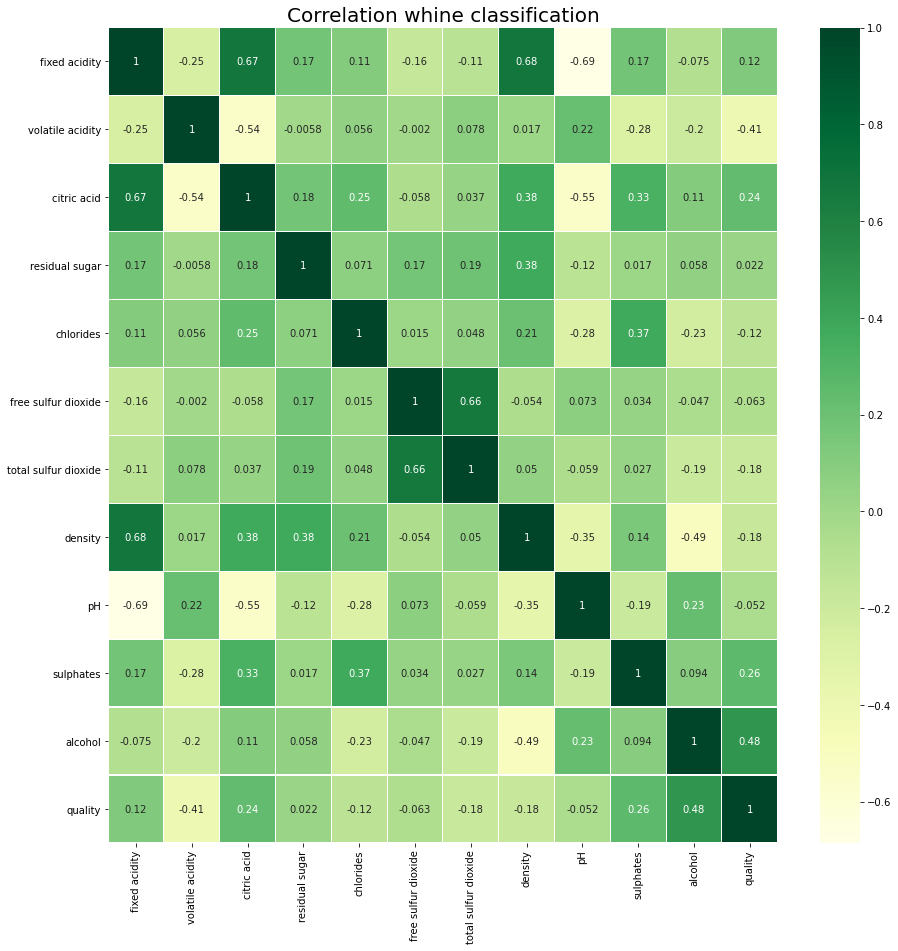

In [206]:
def get_headmap(wine: dict):
    corr = wine.corr()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, cmap="YlGn", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("Correlation whine classification", size=20)
get_headmap(wine)

### Counting amount per quality

In [132]:
#method to calculate how much wines are in any quality

winePerQua = {}
for value in wine.quality:
    if value not in winePerQua:
        winePerQua[value] = 0
    winePerQua[value] += 1
winePerQua

{5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}

In [133]:
#spliting winePerQua to 2 lists - one for values, one for qualities.
values = [vl for vl in winePerQua.values()]
names = [nm for nm in winePerQua]

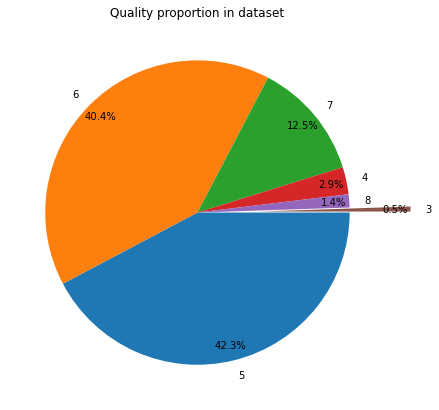

In [163]:
plt.figure(figsize=(7, 7))
plt.pie([values][0], radius = 1,
        labels=[names][0], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0,0,0,0.4])
#plt.pie([wine.shape[0]], labeldistance=-0, radius=0.5, colors=['powderblue'])
plt.title("Quality proportion in dataset")
plt.show()

# Modeling

### Spliting to train and test

In [269]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [254]:
Y = wine['quality']
X = wine[wine.columns[0: len(wine.columns)-1]]

In [256]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [257]:
Y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

In [267]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
print("Training", {x_train.shape})
print("Test", {x_test.shape})

Training {(914, 11)}
Test {(229, 11)}


### Scaling

In [275]:
from sklearn.preprocessing import StandardScaler

In [289]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Train dataset after scaler')
pd.DataFrame(x_train).head(10).style.background_gradient(cmap=sns.light_palette("brown", as_cmap=True))

Train dataset after scaler


,0,1,2,3,4,5,6,7,8,9,10
0,0.455935,0.807629,-0.782576,0.217098,0.132018,-0.430764,-0.057061,1.117434,-0.003921,-0.616150,-0.860873
1,-0.899451,0.587156,-0.174866,-0.322108,-0.137414,-0.430764,2.174909,-0.668410,0.310466,0.233434,0.423336
2,-0.899451,-1.397107,0.078346,-0.091019,-1.546751,2.032747,1.609477,-3.086953,-0.318308,-1.522373,1.157170
3,0.964205,0.256445,-0.225509,-0.476166,-0.137414,-0.627845,-0.414176,0.362277,-1.135715,-0.616150,-0.860873
4,1.133628,-1.176633,0.939268,2.990157,-0.282493,-1.022007,-0.979609,0.464325,-0.506941,0.913101,1.982734
5,0.625358,-0.184502,0.382201,0.833333,-0.095963,-1.022007,-0.949849,1.025590,-0.129676,-0.786067,0.239878
6,2.376065,-0.845923,1.698905,0.063039,-0.116689,1.540045,0.776208,1.484807,-1.324347,0.403351,0.056419
7,0.060614,-1.231752,0.128989,0.448186,2.225297,-0.135143,-0.592734,-0.678615,-0.569818,0.686546,1.432358
8,0.512409,-0.570331,1.141838,-0.091019,-0.013061,0.751721,2.085631,0.464325,-0.506941,-0.106399,-0.860873
9,0.286512,-1.617581,0.432844,-0.630225,-0.655553,-0.233683,-0.562974,-1.403157,-1.072837,-0.389594,0.790253


### Dummy model

In [305]:
optQua = len(wine.quality.unique())
dummyModelScore = 1 / optQua

In [ ]:
#האם יש דרך יותר "פורמלית" למודל אפס?

In [291]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [293]:
parameters = {'n_estimors': [100, 200, 300], 'max_depth':[14, 16, 18]}

model_xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, max_depth=14, verbosity = 0)
clf = GridSearchCV(model_xgb, parameters)
#print("loading")
clf.fit(x_train, y_train)
#print("Done")

Training ...
Training finished!


In [295]:
clf.cv_results_

{'mean_fit_time': array([0.77258754, 0.72369366, 0.73151655, 0.72611833, 0.76669354,
        0.73645015, 0.74282789, 0.74103603, 0.75131717]),
 'std_fit_time': array([0.03285945, 0.0071953 , 0.01238641, 0.0074389 , 0.03899267,
        0.01115446, 0.01862328, 0.02213879, 0.0251842 ]),
 'mean_score_time': array([0.00394449, 0.00470204, 0.00323391, 0.00311093, 0.00626125,
        0.        , 0.00947118, 0.00624628, 0.        ]),
 'std_score_time': array([0.00224305, 0.00572494, 0.00646782, 0.00622187, 0.00766846,
        0.        , 0.00773507, 0.0076501 , 0.        ]),
 'param_max_depth': masked_array(data=[14, 14, 14, 16, 16, 16, 18, 18, 18],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimors': masked_array(data=[100, 200, 300, 100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False, False, False,
                    False],
    

In [298]:
print(f'Best Score: {clf.best_score_}')
print(f'Best Hyperparameters: {clf.best_params_}')

Best Score: 0.640070858103645
Best Hyperparameters: {'max_depth': 16, 'n_estimors': 100}


In [306]:
print(pow(clf.best_score_, 2) / pow(dummyModelScore, 2))

14.74886532216731


In [ ]:
##don't run untill the end!!
#y_pred = model_xgb.predict(X_test)
#accuracy_score(y_test, y_pred)